# 澳洲航空乘客数量月度数量

* 这是一个我们经常被用来引用做销售预测的例子



## 直接读取数据

* 这个数据有两列 Month, Passengers
* Month 表示数据点是在哪个月
* Passengers 表示那个月对数应的乘客数
* Pandas 在读取数据时会把 Month 当成字符串对象(object)

In [6]:
import pandas as pd
import numpy as np

# Now, we will load the data set and look at some initial rows and data types of the columns:
# url = "../data/AirPassengers.csv" 如果把这个仓库下载后可以使用这个地址
url = "https://raw.githubusercontent.com/liuhui998/time-series-little-book/master/data/AirPassengers.csv"
data = pd.read_csv(url)
print(data.head())
print('\n Data Types:')
print(data.dtypes)


     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

 Data Types:
Month         object
Passengers     int64
dtype: object


## 如何解析以月为单位的数据

* 定义了一个名为 dateparse 的 lambda 来解析 1949-01 这种只有年月的数据
* read_csv 中指定 'Month'列为日期类型，dateparse 为日期解析器
* 同时在 read_csv 中把 'Month' 列设定为索引
* 大家可以留心观查转换后的数据类型 （data.dtypes）

In [7]:

# The data contains a particular month and number of passengers travelling in that month. In order to read the data as a time series, we have to pass special arguments to the read_csv command:
from datetime import datetime
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print ('\n Parsed Data:')
print (data.head())
print("\n >>>>>>")
print(data.dtypes)
print((data.index.dtype))


 Parsed Data:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

 >>>>>>
Passengers    int64
dtype: object
datetime64[ns]


## 数据的可视化
* 之前我们教过 Plot.ly 我们会优先使用它来画图
* 如果有 Plot.ly 不能处理的图，我们也会使用其它工具来做
* 大家保持开放心态哈

### 使用 plotly.express 来画时间序列
* 我把日期转成了索引(index), 所以 x 轴使用了 data.index
* 我们使用 乘客数量(Passengers) 来做为 y 轴
* 为了让 x 轴和 y轴的提示都是中文，我在 line 函数中增加了一个 labels参数
  * 它接收是一个 dict 对象，key 里是原始显示的名字，value 是新的显示名字 
  * x 轴因为指定的是 data.index, 没有名字，所以 key 是 'x'
  * y 轴因为指定的Passengers, 所以 key 是 'Passengers'

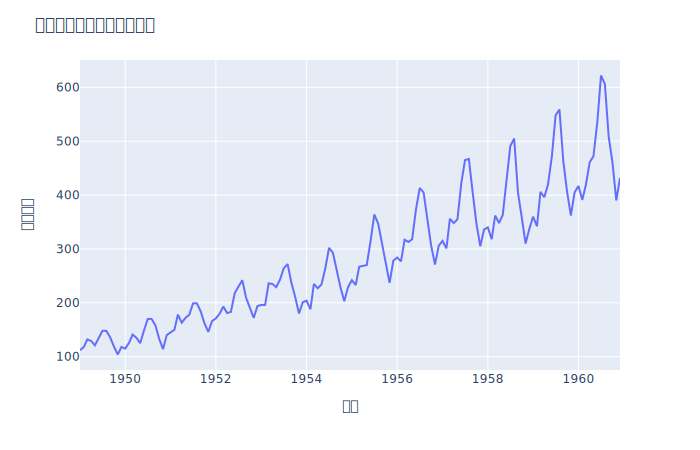

In [3]:
import plotly.express as px
fig = px.line(
    data,
    x = data.index,
    y ='Passengers',
    labels = {'x': '时间','Passengers': '乘客数量'}
)
fig.update_layout(title_text='澳洲航空乘客数量月度数量')
fig.show('svg')

### 使用 Plotly Express cufflinks 来画时间序列
* 它直接使用了 index 当做 x 轴
* 它直接使用了 Passengers 当做 y 轴
* 在 data (DataFrame) 后直接加上 iplot 就可以画图，比较简单

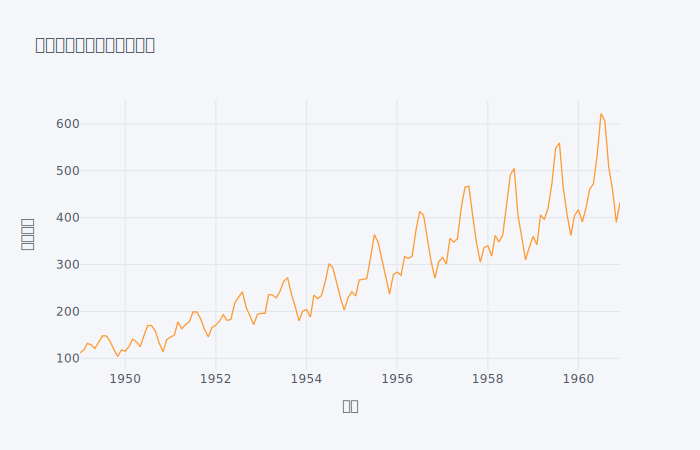

In [4]:
import cufflinks as cf
fig = data.iplot(asFigure=True, xTitle="时间",yTitle="乘客数量", title="澳洲航空乘客数量月度数量")
fig.show('svg')

In [5]:
# 参考资料
# https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/#